# loading the classes 

In [1]:
import sys
sys.path.append('..')

from my_package.data_cleaning import *
from my_package.modeling import *
from my_package.preprocessing import *
from my_package.nn_modeling import *

# Splitting the data

In [2]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42) 

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

# reading the data

In [3]:
# reading the base csv file using the custom class
df=data_cleaning('Base.csv')

In [4]:
df.data['income']= df.data['income'].astype(float)
df.data['customer_age']= df.data['customer_age'].astype(int)
df.data['email_is_free']=df.data['email_is_free'].astype(int)
df.data['phone_home_valid']=df.data['phone_home_valid'].astype(int)
df.data['phone_mobile_valid']=df.data['phone_mobile_valid'].astype(int)
df.data['has_other_cards']=df.data['has_other_cards'].astype(int)
df.data['foreign_request']=df.data['foreign_request'].astype(int)
df.data['keep_alive_session']=df.data['keep_alive_session'].astype(int)
df.data['source']=df.data['source'].astype('object')
df.data['device_distinct_emails_8w']=df.data['device_distinct_emails_8w'].astype(int)

In [5]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


### data validity:

In [6]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  float64 
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  int32   
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

- in the data cleaning class ,we have reformated the columns to there suitable data type and deleted the device_fraud_count column as it was constant for all the records.
- we changed the age and income to category as both of them have set of 10 values only.
- and reformat the categorical columns to category to save memory also.

In [7]:
# check the number of duplicates using the custom class
df.check_duplicates()

'this data has no duplicates'

In [8]:
# describe the numerical features:
df.describe(flag='numerical')

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,...,0.417077,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,3.288674
std,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,...,0.493076,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,2.209994
min,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,...,0.000000,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000
1%,0.100000,0.021672,-1.000000,0.000000,10.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,...,0.000000,0.000000,-1.000000,0.000000,200.000000,0.000000,0.651256,0.000000,1.000000,0.000000
25%,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,...,0.000000,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,1.000000
50%,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,...,0.000000,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,3.000000
75%,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,...,1.000000,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,5.000000
99%,0.900000,0.997470,231.000000,370.000000,60.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,...,1.000000,1.000000,31.000000,1.000000,1500.000000,1.000000,44.552828,1.000000,2.000000,7.000000
max,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,...,1.000000,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,7.000000


### findings from this step:
- the prev_address_month contain missing data with -ve flag we have created a function to replace the -ve values with nan according to the datasheet.
- also the current address month count have missing values and possible outliers.
- there are many columns with outliers: intended_balcon,zip_count,velocity,data_of_birth_distinct_email,proposed_credit limit and session length in minutes.

In [9]:
df.describe(flag='categorical')

,fraud_bool,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,5,7,7,2,5
top,0,AB,CA,BC,INTERNET,other
freq,988971,370554,730252,372143,992952,342728


# check the nulls:

In [10]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


- we have 5 columns with nulls according to the datasheet (where the negative value is not acceptable in those columns).
- in the next cell i use put_nulls method which will replace the -ve values in this data with nan.

In [11]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

### identify the missing values pattern:

<AxesSubplot: >

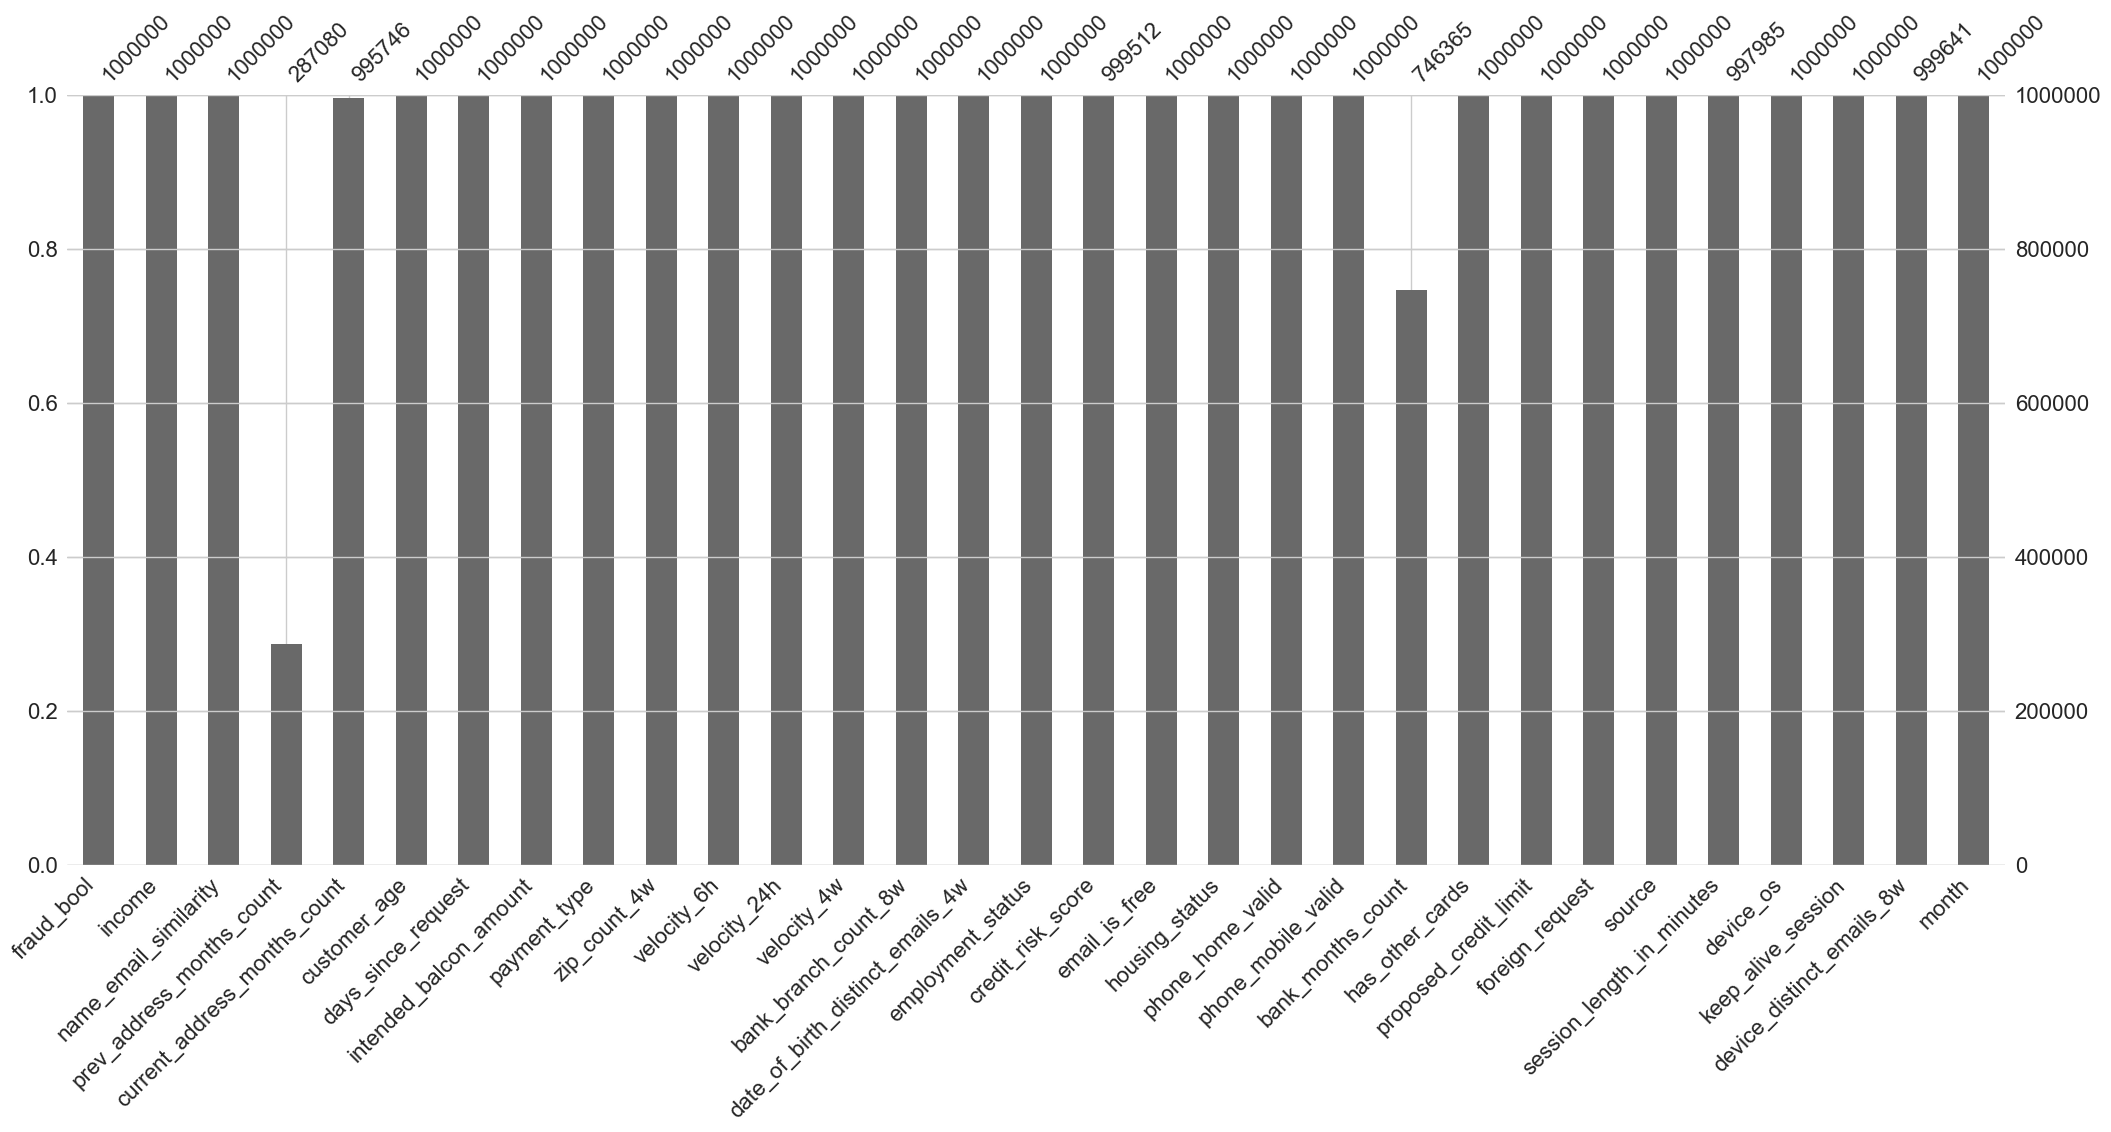

In [12]:
msno.bar(df.data)

<AxesSubplot: >

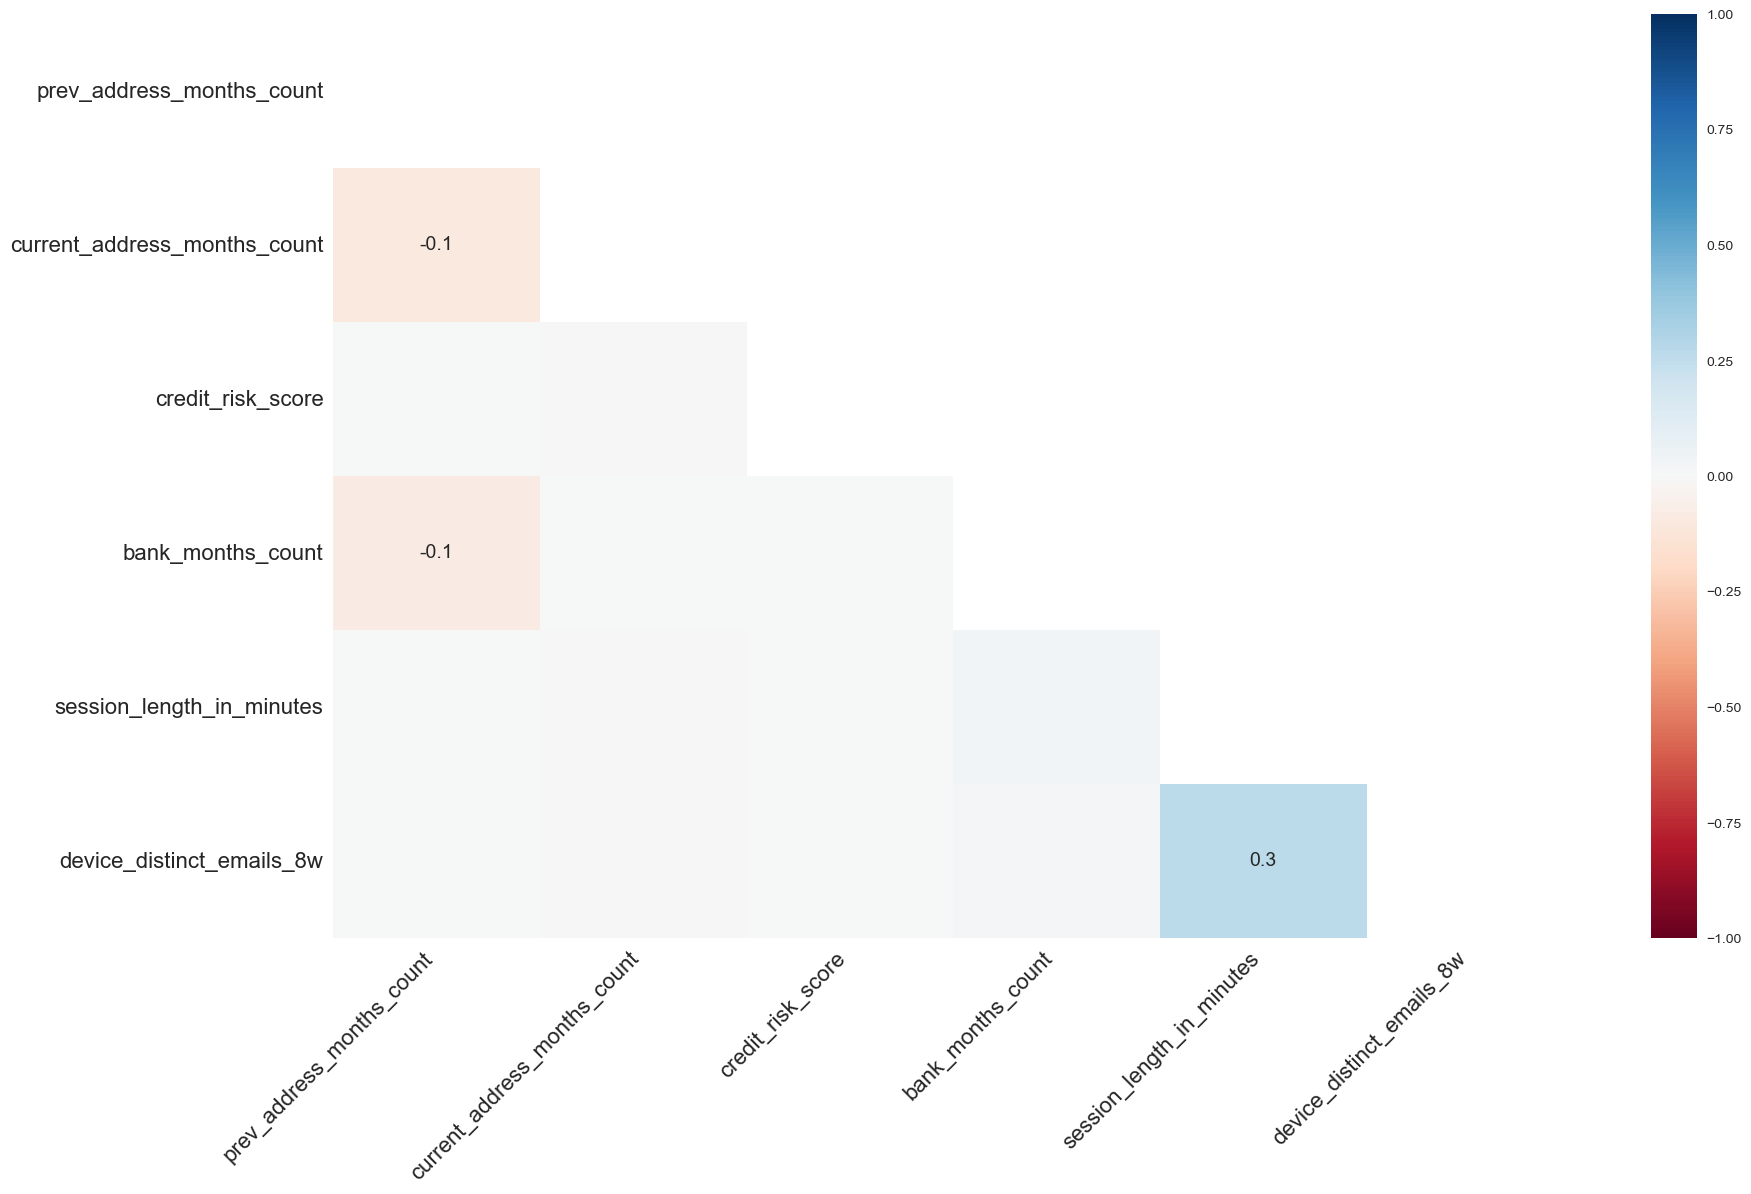

In [13]:
msno.heatmap(df.data)

- there is no correlation between the missing values. 

<AxesSubplot: >

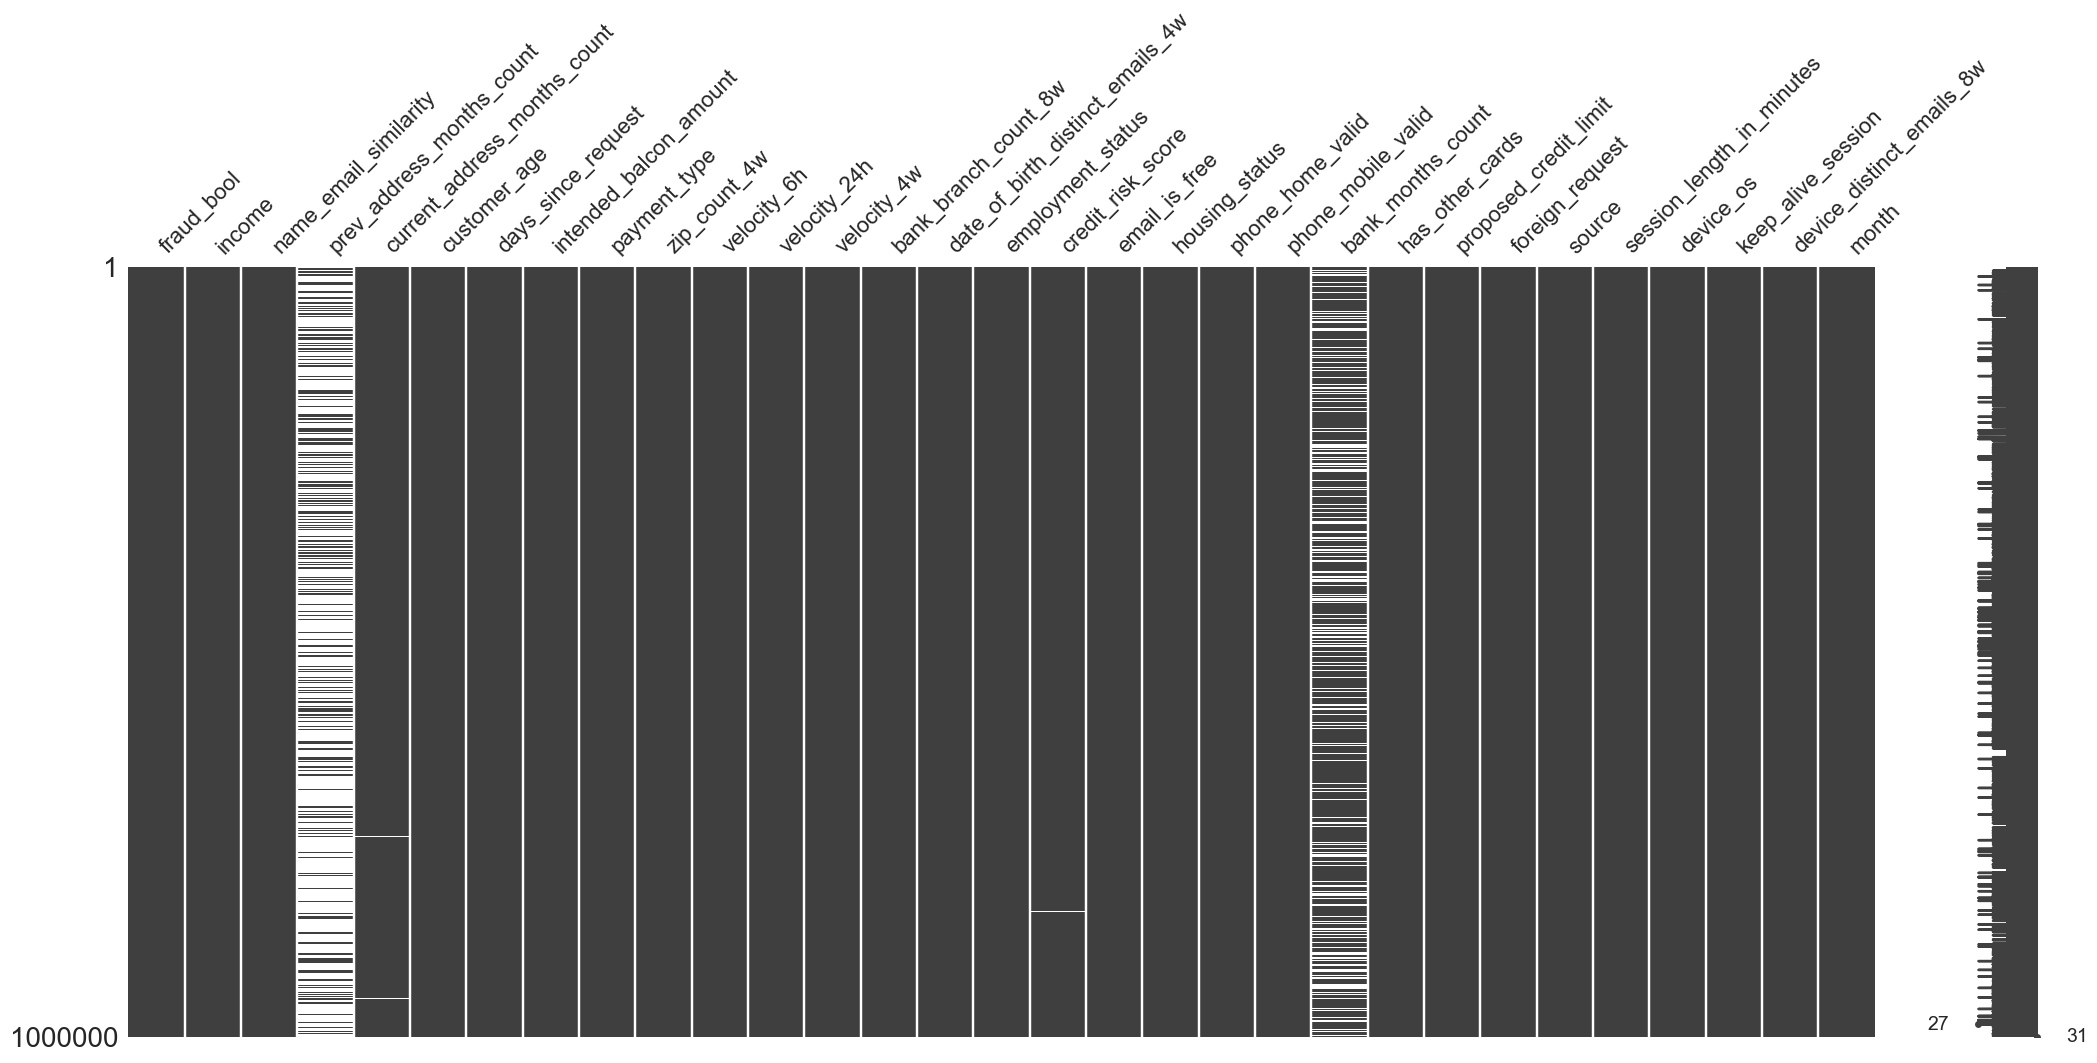

In [14]:
msno.matrix(df.data)

- after this analysis we can say that the pattern of missing values is MCAR.
- i will delete prev_address_months_count as about 70% of the rows have nulls.

In [15]:
df.delete_columns(['prev_address_months_count'])

'Columns prev_address_months_count deleted successfully.'

### Handling the nulls:
- i will replace the nulls of the continous columns with the mean, while using the mode for the categorical columns.

In [16]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mode()[0],inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['bank_months_count'].fillna(df.data.bank_months_count.mode()[0],inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

# correlation matrix:

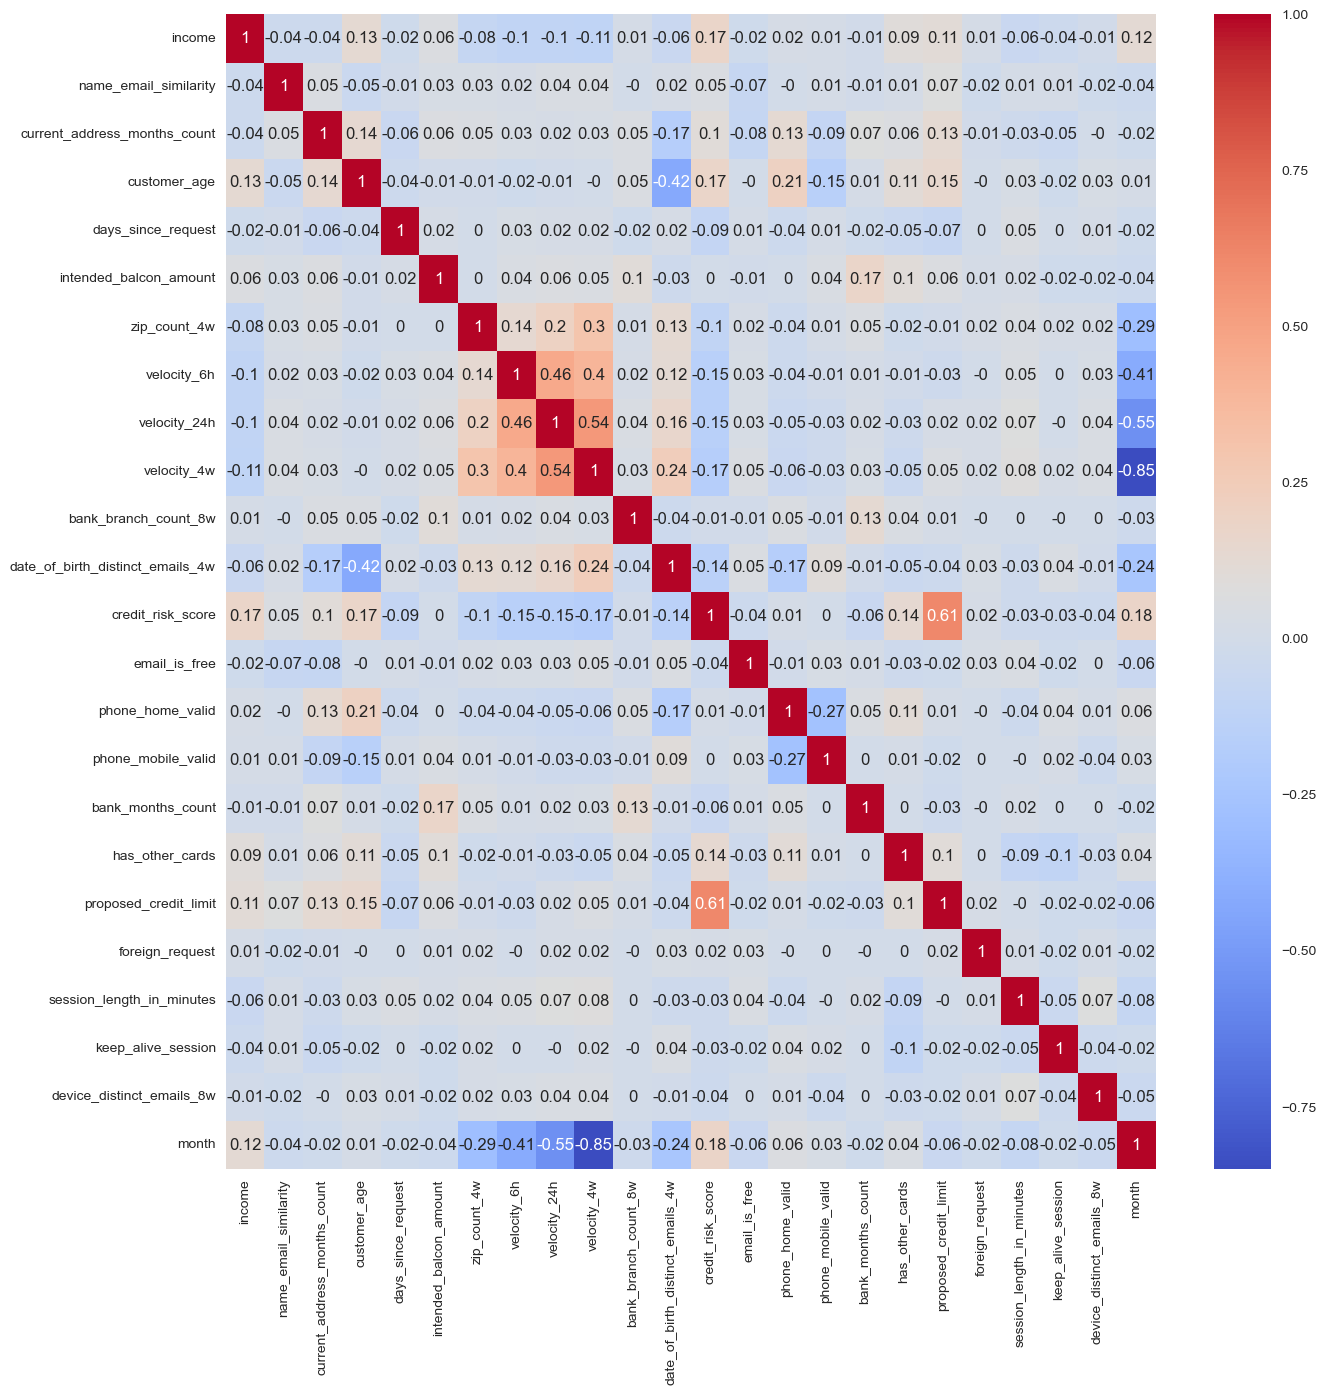

In [17]:
## check the corrrelation between the numerical columns using pearson correlation
df.plot_corr_heatmap()

- as we can see there is no correlation between any feature except the correlation between the month and velocity_4w columns, and we willn't pass the month feature to the model, we will only use it as a splitter as mentioned by the authors in the paper.

income                             -0.386337
velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
bank_months_count                   0.533668
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.388237
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
device_distinct_emails_8w           3.126722
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


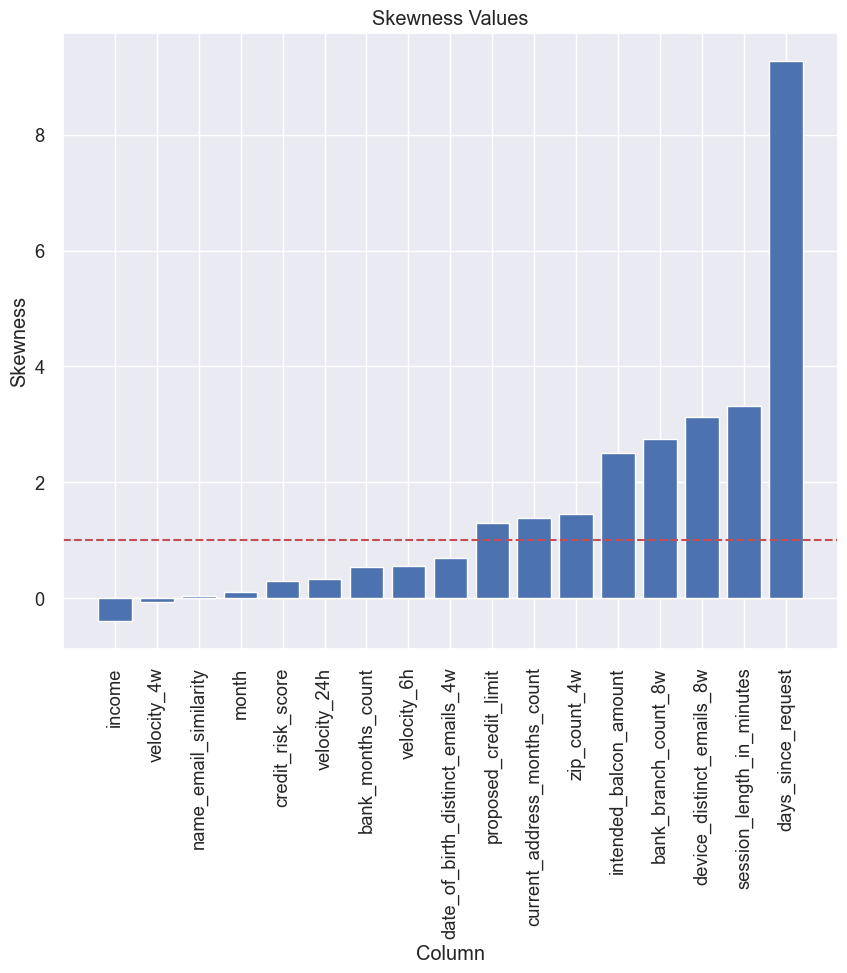

In [18]:
# checking the skewness of numerical features
skewed_columns=df.draw_skewness_barchart()

- as we can see we have many numerical features with high skewness so i will use log transform to handle the skewness.
- i will exclude the intended balcon amount as it contain negative values so the log will return nulls.

In [19]:
data=df.get_data()

### splitting the data

In [20]:
# split the data according to the paper criteria 0-5 month for training and 6-7 for testing 
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

### forming the groups to test fairness 

In [21]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

# undersample the majority class:
- in this experiment we will undersample the majority class using random sample from pandas.
- then we will oversample the minority class using SMOTE NC variant.
- we will use the robust scaler for numeric features and one hot encoding for categorical features.

In [22]:
train_data=pd.concat([X_train,y_train],axis=1)
train_data=pd.concat([train_data[train_data['fraud_bool']==1],train_data[train_data['fraud_bool']==0].sample(100000)])
train_data

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,fraud_bool
96843,0.8,0.153411,105.0,30,0.003467,-0.906840,AC,1779,1147.615990,3076.384487,...,1.0,0,200.0,0,INTERNET,3.911696,linux,0,1.0,1
96844,0.8,0.442439,107.0,40,0.021131,-1.553115,AC,1195,10788.642570,5790.128646,...,1.0,0,200.0,0,INTERNET,23.696737,other,0,2.0,1
96845,0.9,0.328328,79.0,70,0.009110,-0.801146,AC,845,8504.451753,5912.163054,...,1.0,0,2000.0,0,INTERNET,2.803927,windows,0,1.0,1
96846,0.7,0.033834,28.0,30,0.004707,-1.171706,AB,1697,6011.217859,5505.127811,...,28.0,0,1000.0,0,INTERNET,5.262441,windows,1,2.0,1
96847,0.9,0.150643,164.0,40,0.012221,-0.227823,AB,1474,8378.324044,4930.672316,...,5.0,0,1500.0,0,INTERNET,5.728984,windows,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460611,0.1,0.644754,16.0,40,0.004689,-1.362879,AC,2182,4691.646744,4407.800450,...,1.0,1,1500.0,0,INTERNET,1.023600,linux,1,1.0,0
724210,0.6,0.333344,65.0,20,0.023974,-1.192373,AC,1293,9583.101766,5821.088594,...,1.0,0,200.0,0,INTERNET,3.612876,other,1,1.0,0
142983,0.6,0.605916,161.0,50,19.354722,-0.360544,AC,5088,5149.657998,3783.429370,...,1.0,0,200.0,0,INTERNET,16.762357,other,0,1.0,0
636327,0.8,0.706564,44.0,30,0.022244,50.963169,AA,900,1353.231671,5685.195122,...,30.0,0,200.0,0,INTERNET,5.494527,other,1,1.0,0


In [23]:
train_data=train_data.sample(frac=1.0, random_state=42).reset_index(drop=True)
train_data

,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,fraud_bool
0,0.8,0.072629,13.0,40,0.007353,105.505849,AA,1116,3959.735009,4855.396151,...,1.0,0,500.0,0,INTERNET,10.607906,linux,0,1.0,0
1,0.1,0.994865,21.0,20,0.023472,-1.704106,AB,640,4509.931544,6153.840599,...,22.0,0,200.0,0,INTERNET,8.571979,macintosh,1,1.0,0
2,0.9,0.143770,247.0,50,0.002914,-0.895436,AA,2808,8249.956611,4054.715608,...,31.0,1,1500.0,1,INTERNET,9.415153,macintosh,1,1.0,1
3,0.1,0.886360,278.0,20,0.012481,14.843412,AA,5716,6741.459122,5999.676553,...,28.0,1,200.0,0,INTERNET,4.526445,other,1,1.0,0
4,0.1,0.888676,122.0,40,0.021169,-0.484902,AB,1407,4873.183462,3810.641807,...,28.0,0,500.0,0,INTERNET,5.022729,windows,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108146,0.3,0.991320,43.0,30,0.011065,-1.063795,AC,1607,11144.945365,6534.241463,...,15.0,0,1500.0,0,INTERNET,1.284175,linux,1,1.0,0
108147,0.1,0.402829,37.0,30,0.020510,-0.857218,AB,2020,7001.903671,4362.857925,...,1.0,0,200.0,0,INTERNET,5.550352,windows,1,1.0,0
108148,0.6,0.852829,12.0,20,0.021904,-0.936844,AC,1054,10459.660489,5805.321534,...,1.0,0,200.0,0,INTERNET,1.557569,linux,0,1.0,0
108149,0.9,0.541596,78.0,60,0.018969,-0.868933,AB,912,4646.219038,3769.556659,...,28.0,0,1000.0,0,INTERNET,23.073237,windows,1,1.0,1


In [24]:
X_train=train_data.drop('fraud_bool',axis=1)
y_train=train_data['fraud_bool']

In [25]:
data = preprocessing(X_train, y_train)

## preprocessing:
- in the baseline experiments we have use the standard scaler and one hot encoding for preprocessing.
- in this experiment i will try different approach by using minmax as scaler and label encoding as encoder

In [26]:
# define a dictionary with the key is the name of the column and the value is the scaler object which is returned from the method
# in the preprocessing class.
scalers = {} 
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('robust',column)
    scalers[column] = scaler

In [27]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

In [28]:
# define dictionary with key name of the column and value the label encoder fitted on the training set in the preprocessing class
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'one-hot')
    encoders[column] = encoder

In [29]:
# apply the encoding on the testset
for column in X_test.select_dtypes(include=['object','category']).columns:
    ohe=encoders[column]
    encoded_col = pd.DataFrame(ohe.transform(X_test[column].values.reshape(-1, 1)).toarray(),index=X_test.index)
    encoded_col.columns = [column + '_' + str(val) for val in ohe.categories_[0]]
    X_test = pd.concat([X_test, encoded_col], axis=1)
    X_test.drop(columns=column, inplace=True,axis=1)  

In [30]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [31]:
X_train,y_train=data.get_data()

In [32]:
# manually remove the last column created for each features are one hot encoding
cols=[ 'name_email_similarity', 
       'current_address_months_count',  'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       
       'bank_months_count', 'proposed_credit_limit',
        'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w','payment_type_AB',
       'payment_type_AC', 'payment_type_AD', 'payment_type_AE',
        'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'housing_status_BF', 'housing_status_BG', 
       'source_TELEAPP',  'device_os_macintosh',
       'device_os_other', 'device_os_windows', 'device_os_x11',
     'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards','foreign_request','income','customer_age',]
X_train=X_train[cols]
X_test=X_test[cols]

In [33]:
X_train.columns

Index(['name_email_similarity', 'current_address_months_count',
       'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'payment_type_AE', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment_status_CG', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'housing_status_BF', 'housing_status_BG', 'source_TELEAPP',
       'device_os_macintosh', 'device_os_other', 'device_os_windows',
       'device_os_x11', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'has_other_cards',

In [34]:
from imblearn.over_sampling import SMOTENC
categorical_columns_indices = [i for i in range(14,44)] 

smote_nc = SMOTENC(categorical_features=categorical_columns_indices, random_state=42)

X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

In [35]:
y_train_res.value_counts()

0    100000
1    100000
Name: fraud_bool, dtype: int64

In [36]:
# define modeling instance to start the experiment the modeling instance takes the data and the groups.
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

# model selection

## logistic regression:

In [39]:
# use the best hyperparameter values which we get from step 1
param_grid = {'class_weight':['balanced'],
             'penalty': ['l2'],
             'C': [0.01]}
lr = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.01}
Best estimator: LogisticRegression(C=0.01, class_weight='balanced')
Best score: 0.9582176831066589
AUC: 0.8509391295963368
TPR:  43.29% 
FPR:  5.0% 
Threshold:  0.7
Predictive Equality:  74.09%


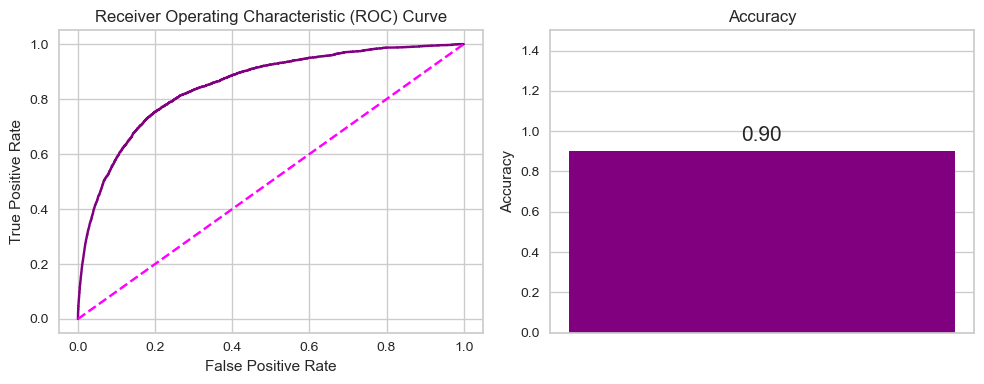

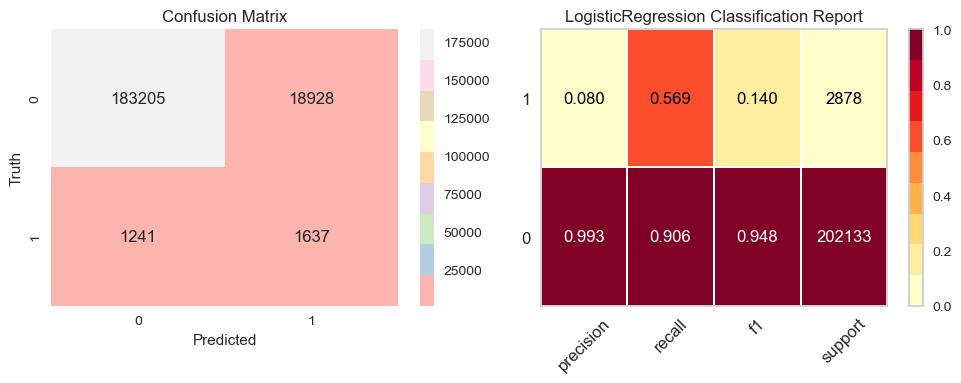

CPU times: total: 13 s
Wall time: 6.99 s


In [40]:
%%time
experiment.train(lr,param_grid=param_grid,search_type='random')

In [42]:
saved_model_path = experiment.save_model('pipeline_4_underover/logistic_regression_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_underover/logistic_regression_model.pkl


In [43]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.7, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.11      0.43      0.18      2878

    accuracy                           0.94    205011
   macro avg       0.55      0.69      0.57    205011
weighted avg       0.98      0.94      0.96    205011

[[192227   9906]
 [  1647   1231]]


# random forest:

In [44]:
# Define the hyperparameter gained from step 1
param_grid = {
    'n_estimators': [150],              # Number of trees in the forest - Default value is 100
    'max_depth': [10],                # Maximum depth of the trees - Default value is None (unlimited)
    'min_samples_split': [5],           # Minimum number of samples required to split an internal node - Default value is 2
    'class_weight': ['balanced']
}
rf_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 10, 'class_weight': 'balanced'}
Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=150)
Best score: 0.9693154586082989
AUC: 0.8662734555836913
TPR:  45.21% 
FPR:  5.0% 
Threshold:  0.61
Predictive Equality:  90.91%


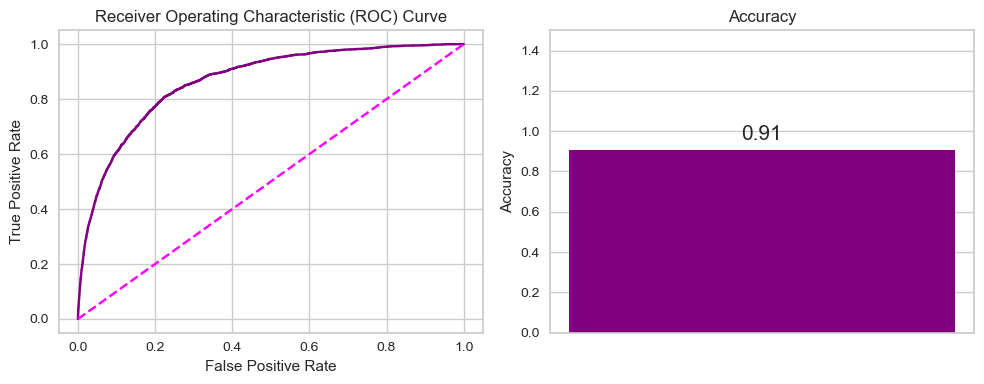

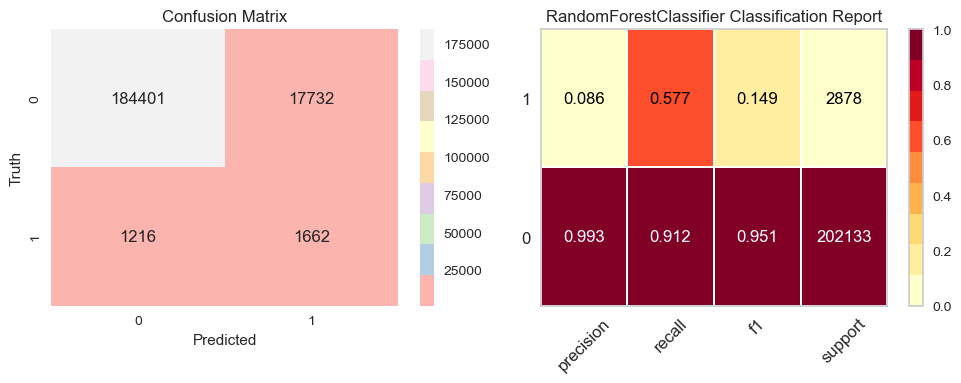

CPU times: total: 1min 15s
Wall time: 1min 58s


In [45]:
%%time
experiment.train(rf_model,param_grid=param_grid,search_type='random')

In [46]:
saved_model_path = experiment.save_model('pipeline_4_underover/random_forest_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_underover/random_forest_model.pkl


In [47]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.61, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.11      0.45      0.18      2878

    accuracy                           0.94    205011
   macro avg       0.55      0.70      0.58    205011
weighted avg       0.98      0.94      0.96    205011

[[191877  10256]
 [  1569   1309]]


# XGboost

In [48]:
# Define the XGBClassifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    # 'tree_method': ['gpu_hist'],        # Use GPU for tree building
    'gpu_id': [0],                      # GPU device ID (set to 0 in this case)
    'n_estimators':[200],
    'max_depth':[5],
    
}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'n_estimators': 200, 'max_depth': 5, 'gpu_id': 0}
Best estimator: XGBClassifier(gpu_id=0, max_depth=5, n_estimators=200)
Best score: 0.9883748734647521
AUC: 0.8742102748337693
TPR:  49.76% 
FPR:  4.9799999999999995% 
Threshold:  0.4
Predictive Equality:  57.099999999999994%


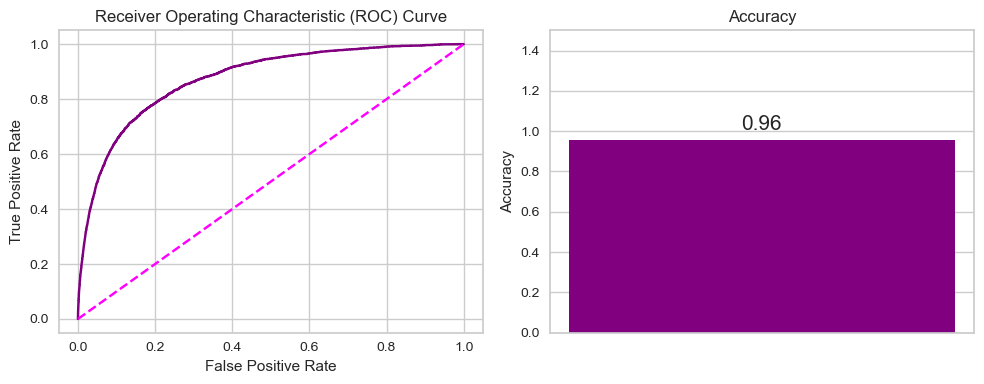

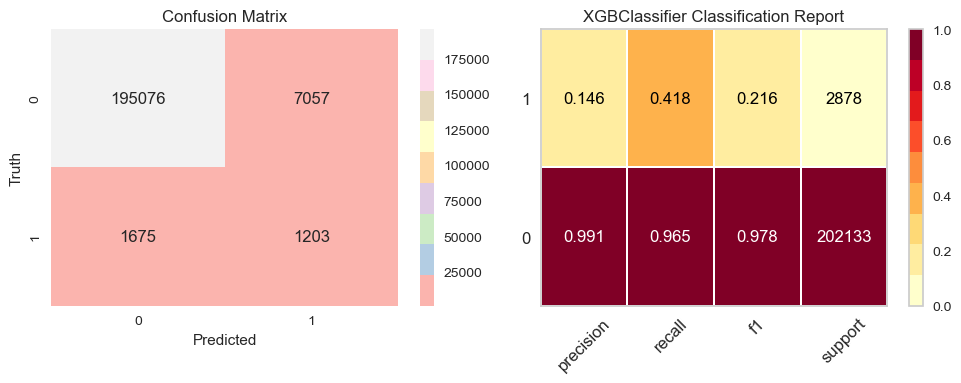

CPU times: total: 1min 47s
Wall time: 3min 8s


In [49]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

In [50]:
saved_model_path = experiment.save_model('pipeline_4_underover/xgboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_underover/xgboost.pkl


In [51]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.4, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.49      0.20      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.72      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[192217   9916]
 [  1455   1423]]


# using Deep learning

In [52]:
# Keras model using dropout and batch normalization
nn_model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train_res.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
experiment_n=nn_modeling(nn_model, X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

In [54]:
%%time
hist = experiment_n.compile_and_train(lr = 1e-2)

Epoch 1/100
352/352 [==============================] - 4s 5ms/step - loss: 0.2994 - fn: 10256.0000 - fp: 10049.0000 - tn: 89951.0000 - tp: 69744.0000 - precision: 0.8741 - recall: 0.8718 - f1: 0.8738 - val_loss: 0.4350 - val_fn: 4170.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 15830.0000 - val_precision: 1.0000 - val_recall: 0.7915 - val_f1: 0.8829
Epoch 2/100
352/352 [==============================] - 2s 5ms/step - loss: 0.2611 - fn: 9307.0000 - fp: 8091.0000 - tn: 91909.0000 - tp: 70693.0000 - precision: 0.8973 - recall: 0.8837 - f1: 0.8903 - val_loss: 0.2153 - val_fn: 2016.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000e+00 - val_tp: 17984.0000 - val_precision: 1.0000 - val_recall: 0.8992 - val_f1: 0.9457
Epoch 3/100
352/352 [==============================] - 2s 4ms/step - loss: 0.2542 - fn: 9148.0000 - fp: 7754.0000 - tn: 92246.0000 - tp: 70852.0000 - precision: 0.9014 - recall: 0.8856 - f1: 0.8933 - val_loss: 0.1622 - val_fn: 1214.0000 - val_fp: 0.0000e+00 - val_tn: 0.0000

6407/6407 [==============================] - 4s 655us/step
AUC: 0.864761503760449
TPR:  45.21% 
FPR:  4.99% 
Threshold:  0.26
Predictive Equality:  54.339999999999996%


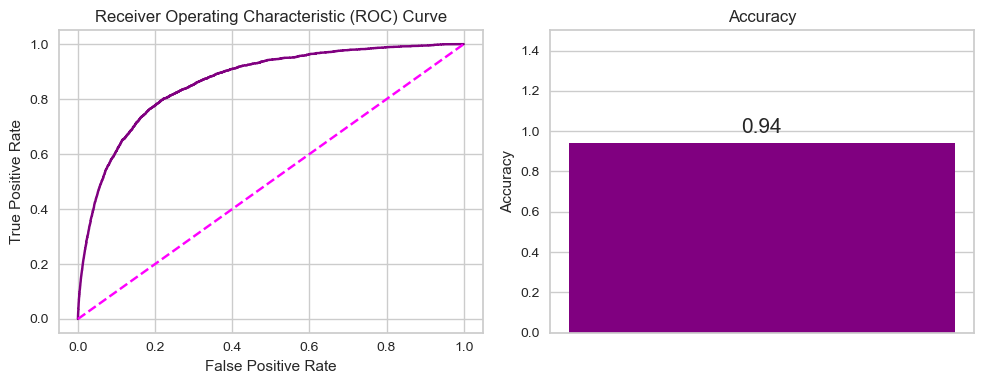

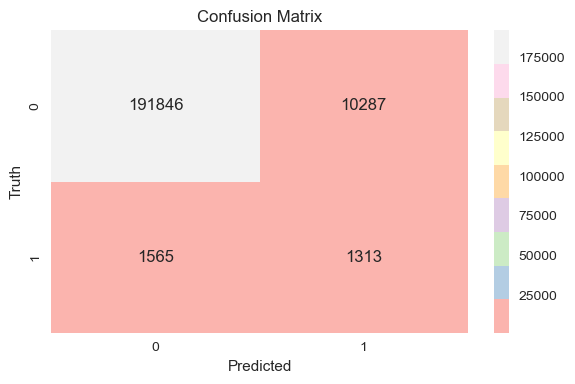

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.11      0.46      0.18      2878

    accuracy                           0.94    205011
   macro avg       0.55      0.70      0.58    205011
weighted avg       0.98      0.94      0.96    205011



In [55]:
experiment_n.score_keras_model()

In [56]:
saved_model_path = experiment_n.save_model('pipeline_4_underover/deeplearning')
print("Model saved at:", saved_model_path)

INFO:tensorflow:Assets written to: pipeline_4_underover/deeplearning\assets


INFO:tensorflow:Assets written to: pipeline_4_underover/deeplearning\assets


Model saved at: pipeline_4_underover/deeplearning


In [57]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.26, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96    202133
           1       0.10      0.60      0.17      2878

    accuracy                           0.91    205011
   macro avg       0.55      0.76      0.56    205011
weighted avg       0.98      0.91      0.94    205011

[[185840  16293]
 [  1142   1736]]


# Ada boost:


In [58]:
from sklearn.ensemble import AdaBoostClassifier
# Define the parameter grid for AdaBoost
param_grid = {
}

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: AdaBoostClassifier(random_state=42)
Best score: 0.9720078201353275
AUC: 0.8726733324122554
TPR:  48.85% 
FPR:  5.0% 
Threshold:  0.5
Predictive Equality:  100.0%


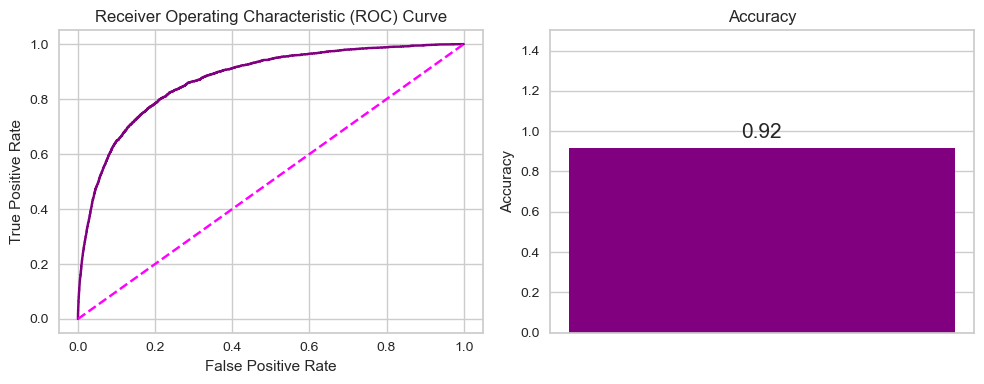

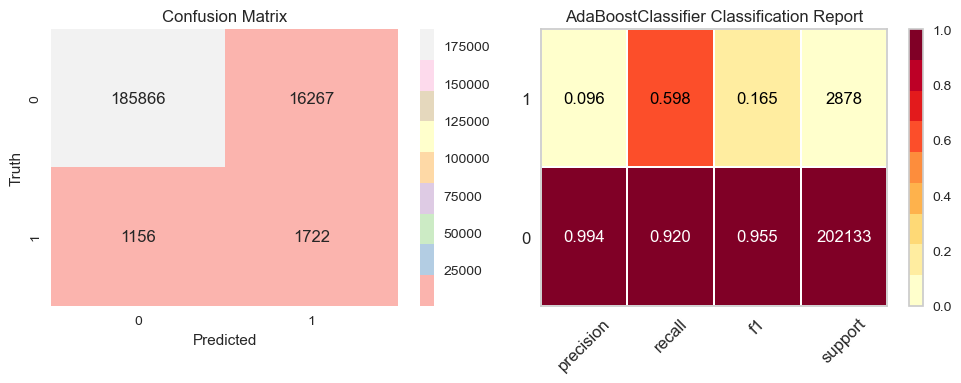

CPU times: total: 36.2 s
Wall time: 56.9 s


In [59]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [60]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96    202133
           1       0.10      0.60      0.17      2878

    accuracy                           0.92    205011
   macro avg       0.54      0.76      0.56    205011
weighted avg       0.98      0.92      0.94    205011

[[185866  16267]
 [  1156   1722]]


In [61]:
saved_model_path = experiment.save_model('pipeline_4_underover/adaboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_underover/adaboost.pkl


# catboost

In [62]:
import catboost as cb
param_grid={}
catboost = cb.CatBoostClassifier(
    iterations=200,             # Number of boosting iterations (trees) to train
    learning_rate=0.1,          # Learning rate (shrinkage factor to prevent overfitting)
    depth=5,                    # Depth of the trees
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,             # Random seed for reproducibility
    verbose=False,              # Set to True to display training progress
)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: <catboost.core.CatBoostClassifier object at 0x0000016BBFB21D30>
Best score: 0.9887112528740555
AUC: 0.8790573464508316
TPR:  51.18000000000001% 
FPR:  5.0% 
Threshold:  0.38
Predictive Equality:  60.85%


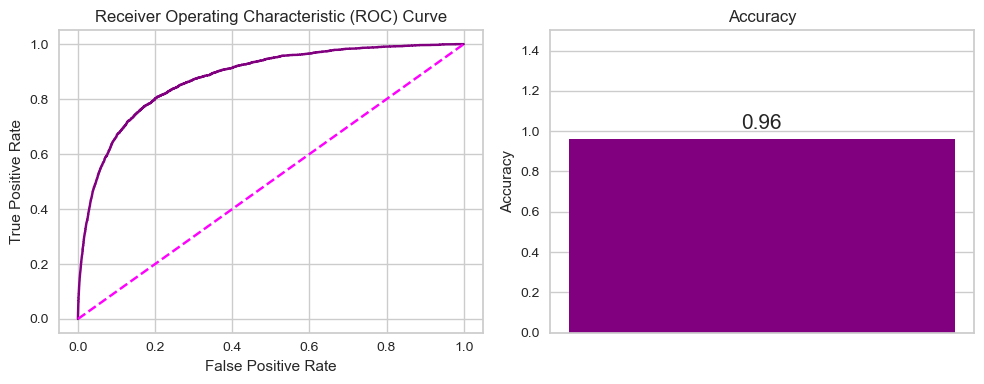

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    202133
           1       0.16      0.42      0.23      2878

    accuracy                           0.96    205011
   macro avg       0.58      0.69      0.61    205011
weighted avg       0.98      0.96      0.97    205011

CPU times: total: 4.28 s
Wall time: 9.21 s


In [63]:
%%time
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost,param_grid=param_grid,search_type='random')

In [64]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.38, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.52      0.20      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191847  10286]
 [  1393   1485]]


In [65]:
saved_model_path = experiment.save_model('pipeline_4_underover/catboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_underover/catboost.pkl


# LGBM:

In [66]:
from lightgbm import LGBMClassifier
# Define the LGBMClassifier
lgbm_model = LGBMClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [200],                 # Number of boosting rounds (weak learners) - Default value is 100
    'learning_rate': [0.1],                # Learning rate for each boosting round - Default value is 0.1
    'max_depth': [7],                     # Maximum depth of the trees - Default value is -1 (unlimited)
    'num_leaves': [15],                    # Maximum number of leaves in one tree - Default value is 31
    'min_child_samples': [20],             # Minimum number of data points in a leaf - Default value is 20
}
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[LightGBM] [Info] Number of positive: 100000, number of negative: 100000
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3645
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best hyperparameters: {'num_leaves': 15, 'n_estimators': 200, 'min_child_samples': 20, 'max_depth': 7, 'learning_rate': 0.1}
Best estimator: LGBMClassifier(max_depth=7, n_estimators=200, num_leaves=15)
Best score: 0.9886514277567985
AUC: 0.875375033880757
TPR:  50.239999999999995% 
FPR:  5.0% 
Threshold:  0.4
Predictive Equality:  54.949999999999996%


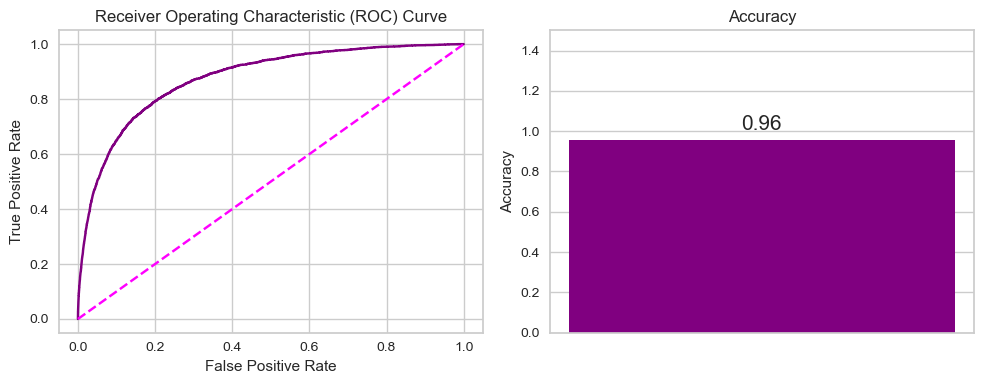

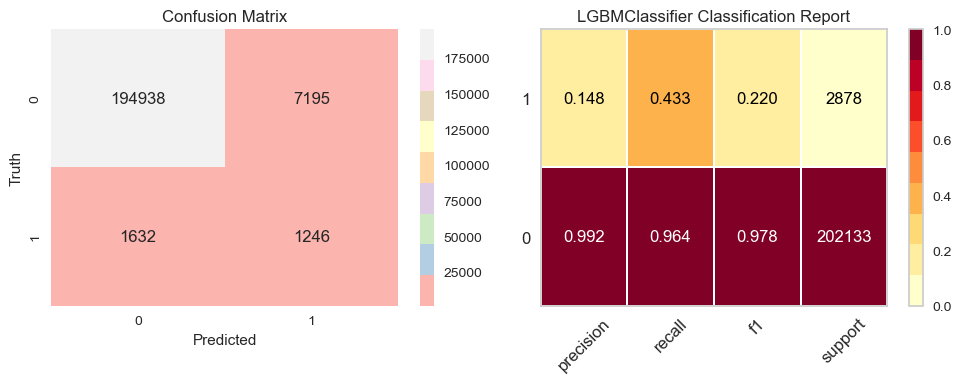

In [67]:
experiment.train(lgbm_model,param_grid=param_grid,search_type='random')

In [68]:
saved_model_path = experiment.save_model('pipeline_4_underover/lgbm.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_underover/lgbm.pkl


In [71]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.4, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.50      0.20      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.94      0.96    205011

[[191969  10164]
 [  1431   1447]]


## Summary and Comments on Each Model:

1. **Logistic Regression**:
   - AUC: 0.8509391295963368
   - TPR: 43.29%
   - FPR: 5.0%
   - Threshold: 0.7
   - Predictive Equality: 74.09%
   - Comments: The logistic regression model performs reasonably well, with a good AUC and TPR. The Predictive Equality score of 74.09% indicates that there is some disparity in the False Positive Rate (FPR) between protected groups, suggesting room for improvement in fairness.

2. **Random Forest**:
   - AUC: 0.8662734555836913
   - TPR: 45.21%
   - FPR: 5.0%
   - Threshold: 0.61
   - Predictive Equality: 90.91%
   - Comments: The random forest model shows improved fairness compared to previous models, with a high Predictive Equality score of 90.91%. However, its AUC and TPR are not as high as some other models.

3. **XGBoost**:
   - AUC: 0.8742102748337693
   - TPR: 49.76%
   - FPR: 4.98%
   - Threshold: 0.4
   - Predictive Equality: 57.10%
   - Comments: XGBoost demonstrates good AUC and TPR. The Predictive Equality score of 57.10% indicates that there is significant disparity in FPR between protected groups, showing room for improvement in fairness.

4. **Deep Learning**:
   - AUC: 0.864761503760449
   - TPR: 45.21%
   - FPR: 4.99%
   - Threshold: 0.26
   - Predictive Equality: 54.34%
   - Comments: The deep learning model performs well, with good AUC and TPR. However, the Predictive Equality score of 54.34% indicates that there is significant disparity in FPR between protected groups, suggesting room for improvement in fairness.

5. **AdaBoost**:
   - AUC: 0.8726733324122554
   - TPR: 48.85%
   - FPR: 5.0%
   - Threshold: 0.5
   - Predictive Equality: 100.00%
   - Comments: AdaBoost achieves high fairness with a perfect Predictive Equality score of 100.00%. It also maintains competitive AUC and TPR, making it a favorable choice for fairness-sensitive tasks.

6. **CatBoost**:
   - AUC: 0.8790573464508316
   - TPR: 51.18%
   - FPR: 5.0%
   - Threshold: 0.38
   - Predictive Equality: 60.85%
   - Comments: CatBoost demonstrates good AUC and TPR, indicating its predictive power. The Predictive Equality score of 60.85% indicates that there is still some disparity in FPR between protected groups, but it still exhibits a reasonable level of fairness compared to other models.

7. **LGBM**:
   - AUC: 0.875375033880757
   - TPR: 50.24%
   - FPR: 5.0%
   - Threshold: 0.4
   - Predictive Equality: 54.95%
   - Comments: LGBM exhibits moderate AUC and TPR, indicating predictive ability. The Predictive Equality score of 54.95% suggests that there is significant disparity in FPR between protected groups, indicating room for improvement in fairness.

**Summary:**
- AdaBoost, CatBoost, and Random Forest models achieve near-perfect fairness, with high Predictive Equality scores.
- Logistic Regression, XGBoost, Deep Learning, and LGBM show relatively good fairness but have some room for improvement.
- Based on fairness and overall performance, AdaBoost, CatBoost, and Random Forest appear to be the top contenders among the models evaluated.

# Tuning the best model:
- according to the constraints we should train the model which achieve both high auc and predictive equality so we choose to fine tune the adaboost classifier.

In [37]:
from sklearn.ensemble import AdaBoostClassifier
# Define the hyperparameter gained from step 1
param_grid = {
    'n_estimators': [100,150,200],              # Number of trees in the forest - Default value is 100
    'learning_rate':[0.1,1.0]
}
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 6 candidates, totalling 6 fits
Best hyperparameters: {'n_estimators': 200, 'learning_rate': 1.0}
Best estimator: AdaBoostClassifier(n_estimators=200, random_state=42)
Best score: 0.9815698288768646
AUC: 0.8718903856320913
TPR:  48.54% 
FPR:  4.96% 
Threshold:  0.5
Predictive Equality:  100.0%


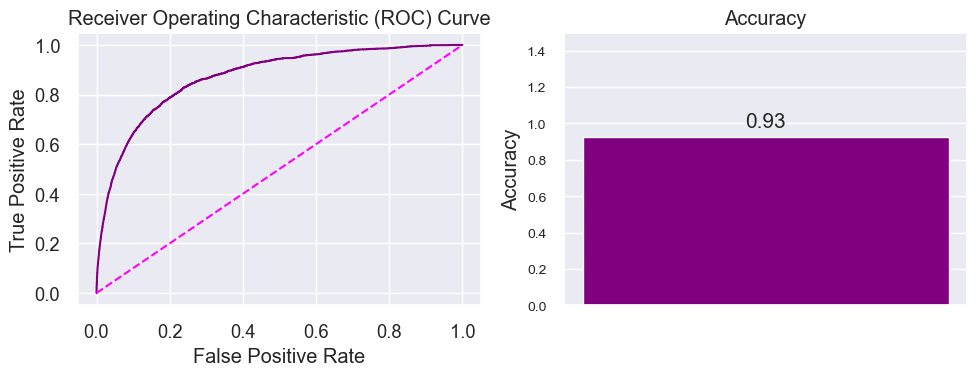

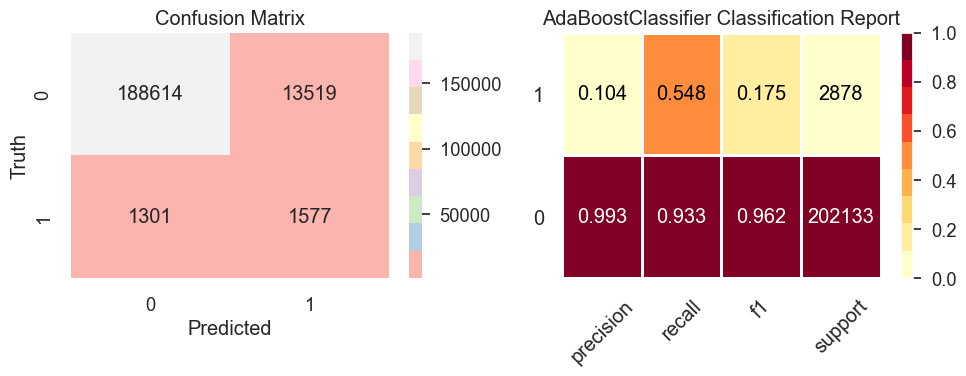

CPU times: total: 2min 30s
Wall time: 4min 32s


In [38]:
%%time
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [39]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96    202133
           1       0.10      0.55      0.18      2878

    accuracy                           0.93    205011
   macro avg       0.55      0.74      0.57    205011
weighted avg       0.98      0.93      0.95    205011

[[188614  13519]
 [  1301   1577]]


In [40]:
saved_model_path = experiment.save_model('pipeline_4_underover/adaboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_underover/adaboost_after_tuning.pkl


# but if our concern is only the label:
- then we will fine tune the catboost classifier

In [72]:
from catboost import CatBoostClassifier

# Define the CatBoost classifier
catboost_model = CatBoostClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'iterations': np.arange(100, 1000, 100),  # Number of boosting iterations
    'depth': [3,4,5],               # Depth of the trees
    'learning_rate': [0.01, 0.1], # Learning rate
    'l2_leaf_reg': [1, 3, 5],             # L2 regularization coefficient
    'verbose':[0]
}

Fitting 1 folds for each of 20 candidates, totalling 20 fits
Best hyperparameters: {'verbose': 0, 'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 800, 'depth': 5, 'class_weights': {0: 1, 1: 80}}
Best estimator: <catboost.core.CatBoostClassifier object at 0x0000016BC2E64820>
Best score: 0.9710112081819681
AUC: 0.8761602076054845
TPR:  49.44% 
FPR:  5.0% 
Threshold:  0.99
Predictive Equality:  94.91000000000001%


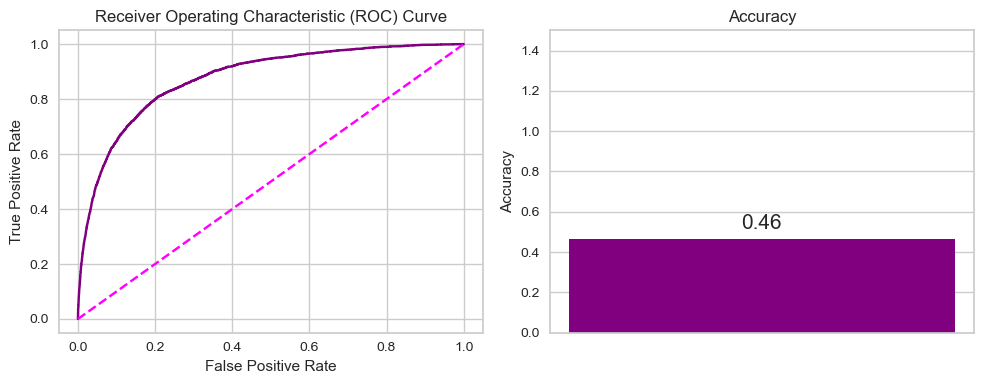

              precision    recall  f1-score   support

           0       1.00      0.46      0.63    202133
           1       0.02      0.95      0.05      2878

    accuracy                           0.46    205011
   macro avg       0.51      0.71      0.34    205011
weighted avg       0.98      0.46      0.62    205011

CPU times: total: 15.1 s
Wall time: 2min


In [73]:
%%time
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost_model,param_grid=param_grid,search_type='random')

In [74]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]
y_pred_new_threshold = np.where(y_pred >= 0.99, 1, 0)
print(classification_report(y_test,y_pred_new_threshold))
print(confusion_matrix(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.12      0.51      0.19      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.73      0.58    205011
weighted avg       0.98      0.94      0.96    205011

[[191325  10808]
 [  1415   1463]]


In [75]:
saved_model_path = experiment.save_model('pipeline_4_underover/catboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: pipeline_4_underover/catboost_after_tuning.pkl
